In [40]:
import sys
sys.path.append("/Users/rajesh/work/github/python_packages")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 

plt.rc('font', family='CMU Serif',)

matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']


data = []
ttl=['al0','al1','al2.5','al5','al7.5','al10','al12.5','al15','al17.5','al20']

x = [float(i[2:]) for i in ttl]
x = np.array(x)

table = []
markers = ['.','o','*','s']
color = ['k','r','b','g']



fig, ax = plt.subplots()
for i in range(1,4):
    data = []
    for j in range(1,11):
        
        foldername = '/Users/rajesh/work/simulations/full_NABS/full'+str(j)+'_'+str(i)
        filename = foldername +'/log.lammps'
        
        #print(filename)
        
        f=open(filename)
        lines=f.readlines()
        
        if (lines[-1].strip().split()[0]=='Total'):
            data.append(float(lines[-64].strip().split()[-2]))
        else:
            print(filename)
            data.append(None)
    data = np.array(data).astype(float)
    table.append(data)
    mask = ~np.isnan(data)
    ax.plot(x[mask],data[mask],markers[i]+color[i]+'-',label=str(i))    

ax.legend()
fig.savefig('density_vs_full.eps',format=None,dpi=300,bbox_inches="tight")        

/Users/rajesh/work/simulations/full_NABS/full3_3/log.lammps
/Users/rajesh/work/simulations/full_NABS/full4_3/log.lammps
/Users/rajesh/work/simulations/full_NABS/full8_3/log.lammps
/Users/rajesh/work/simulations/full_NABS/full10_3/log.lammps


In [3]:
table.append(x)
np.savetxt('density_full.csv',table)

In [12]:
import lmps.log as log
tables = log.reader('/Users/rajesh/Desktop/cash_GNptR/log.2GNp')
type(tables)
print(tables.keys())
#help(tables.keys())
tables['label']

#help(log)
log.draw_plot()

dict_keys(['df', 'label'])


AttributeError: module 'lmps.log' has no attribute 'draw_plot'

In [51]:
df = tables['df']
labels = tables['label']

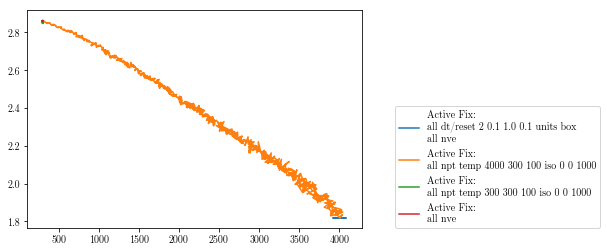

In [42]:
for i in range(1,len(df)):
    plt.plot(df[i]['Temp'],df[i]['Density'],label = labels[i])
plt.legend(loc=[1.1,0])    

In [39]:
import lmps.log as log
#tables = log.reader('log.lammps')
#type(tables)
#print(tables.keys())
#help(tables.keys())
tables.keys()
tables['df'][ ::5]

[    Step  Atoms     PotEng     Volume   Density        Press  Temp  v_chempot  \
 0    0.0  164.0 -14674.217  2188.5286  2.472807  270674.5100   0.0        0.0   
 1    1.0  164.0 -16131.798  2188.5286  2.472807  249364.6800   0.0        0.0   
 2    2.0  164.0 -17265.323  2188.5286  2.472807  306633.4900   0.0        0.0   
 3    3.0  164.0 -18055.783  2188.5286  2.472807  481406.5400   0.0        0.0   
 4    4.0  164.0 -18731.832  2188.5286  2.472807  119651.1500   0.0        0.0   
 5    5.0  164.0 -19344.945  2188.5286  2.472807  378686.9700   0.0        0.0   
 6    6.0  164.0 -19739.875  2188.5286  2.472807  367197.1600   0.0        0.0   
 7    7.0  164.0 -19991.324  2188.5286  2.472807  229369.9600   0.0        0.0   
 8    8.0  164.0 -20122.562  2188.5286  2.472807   25016.5010   0.0        0.0   
 9    9.0  164.0 -20421.463  2188.5286  2.472807  172236.3500   0.0        0.0   
 10  10.0  164.0 -20492.763  2188.5286  2.472807  193971.4500   0.0        0.0   
 11  11.0  164.0

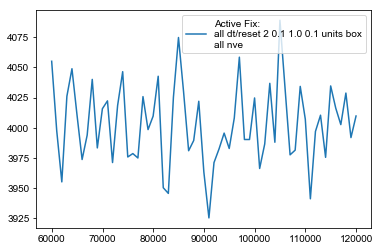

In [82]:
i=1
plt.rc('font', family='arial',)
plt.plot(df[i]['Time'],df[i]['Temp'],label = labels[i])
plt.legend()


In [41]:
from lmps.log import reader

In [42]:
table=reader('/Users/rajesh/Desktop/cash_GNptR/log.2GNp')

In [46]:
table['label'][1]

'Active Fix:\nall qeq/reax 1 0.0 10.0 1e-6 reax/c\nall print 50 "${step} ${atoms} ${pe} ${vol} ${density} ${press} ${temp} ${v_chempot} ${lz} ${v_totnsz}" file GCMC.txt screen no\nwater gcmc 1 1 0 0 111111 300 0 5 mol water\nall npt temp 300 300 100 tri 0 0 1000'

In [47]:
from lmps.log import plotter


In [51]:
%matplotlib qtpy
lp = plotter('/Users/rajesh/Desktop/cash_GNptR/log.2GNp')
lp.show()

KeyError: 'qtpy'